# Introduction to the problem

Clustering for Diversification analysis

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can usea clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same groupshould have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It iscommon in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlationsin returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

<b> Problem Statement 6.1 </b>

Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [12]:
%matplotlib inline
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

symbol_dict={
    'BAJFINANCE': 'Bajaj Finance',
    'TCS':'TCS',
    'AXISBANK':'Axis Bank',
    'HDFCBANK':'HDFC bank',
    'CIPLA':'Cipla',
    'GAIL':'GAIL',
    'HINDALCO':'Hindalco',
    'INFY':'Infosys',
    'ADANIPORTS':'Adani Ports',
    'BPCL':'BPCL',
    'ASIANPAINT':'Asian Paints',
    'DRREDDY':'DRReddy',
    'EICHERMOT':'Eichermot Bank',
    'HDFC':'HDFC',
    'HINDUNILVR':'Hindunilvr',
    'INFRATEL':'Infratel',
    'SUNPHARMA':'Sun Pharma',
    'IOC':'IOC',
    'ITC':'ITC',
    'RELIANCE':'Reliance',
    'IDBI':'IDBI',
    'ADANIPOWER':'Adani Power',
    'NBCC':'NBCC',
    'TITAN':'TITAN',
    'MARUTI':'Maruti',
    'M&M':'Mahendra',
    'HEROMOTOCO':'Hero Motors',
    'AJANTPHARM':'Ajanta Pharma',
    'SUNTV':'Sun Television',
    'LT':'Larson and Turbo'}
symbols,names=np.array(sorted(symbol_dict.items())).T
quotes=[]

for symbol in symbols:
    quotes.append(pd.read_csv('data/'+symbol+'.csv'))
for i,q in enumerate(quotes):
    quotes[i]=quotes[i][quotes[i].Series=='EQ']
close_prices=np.vstack([q['Close Price'] for q in quotes])

In [13]:
prices=pd.DataFrame(close_prices)


In [14]:
prices_df=prices.T
prices_df.columns=symbols
prices_df.head()

,ADANIPORTS,ADANIPOWER,AJANTPHARM,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,...,ITC,LT,M&M,MARUTI,NBCC,RELIANCE,SUNPHARMA,SUNTV,TCS,TITAN
0,356.20,30.25,1633.50,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,...,277.95,1742.40,1375.65,6823.90,197.60,1344.10,654.45,912.20,2365.10,483.65
1,354.50,32.85,1634.25,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,...,283.45,1740.70,1366.35,6953.95,198.25,1356.30,652.35,894.70,2429.15,488.30
2,348.55,33.10,1654.35,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,...,281.65,1755.45,1378.80,6958.20,200.35,1353.10,650.90,887.05,2455.35,481.75
3,347.90,31.90,1633.40,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,...,277.90,1722.60,1352.85,6831.05,194.20,1327.35,653.95,871.35,2536.20,471.65
4,349.45,32.40,1670.25,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,...,286.20,1724.55,1333.40,6790.55,193.55,1318.85,653.15,852.40,2507.15,471.15


<b> Problem Statement 6.2 </b>

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [15]:
returns=prices_df.pct_change().mean()*252
returns=pd.DataFrame(returns)
returns.columns=['Returns']
returns['Volatility']=prices_df.pct_change().std()*sqrt(252)
returns

,Returns,Volatility
ADANIPORTS,0.060499,0.309751
ADANIPOWER,0.305273,0.610532
AJANTPHARM,-0.173891,0.332171
ASIANPAINT,0.097990,0.209462
AXISBANK,0.233194,0.277917
BAJFINANCE,0.454332,0.321058
BPCL,-0.261420,0.436424
CIPLA,0.011817,0.254457
DRREDDY,0.068044,0.298319
EICHERMOT,-0.176484,0.300184


<b> Problem Statement 6.3 </b>

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify theoptimum number of clusters using the Elbow curve method

In [16]:
#format the data as the numpy array to feed into the K-Means algorithm
data=np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

#Removing NaN values, replacing them with 0
cleaned_data=np.where(np.isnan(data),0,data)
cleaned_data

array([[ 0.0604985 ,  0.30975062],
       [ 0.30527262,  0.6105322 ],
       [-0.17389139,  0.3321713 ],
       [ 0.09798958,  0.20946175],
       [ 0.23319431,  0.27791735],
       [ 0.4543322 ,  0.32105847],
       [-0.26141977,  0.43642408],
       [ 0.01181652,  0.25445666],
       [ 0.06804354,  0.29831896],
       [-0.17648413,  0.30018375],
       [-0.0525509 ,  0.33842468],
       [ 0.13794545,  0.21455739],
       [ 0.20908475,  0.15024769],
       [-0.14354459,  0.23914078],
       [ 0.04026343,  0.3367533 ],
       [ 0.29937804,  0.19404108],
       [-0.29600826,  0.45378729],
       [-0.12418651,  0.306023  ],
       [-0.02361697,  0.41899354],
       [-0.41370134,  0.50004589],
       [ 0.04592812,  0.22485638],
       [-0.08590369,  0.31432282],
       [-0.27240099,  0.44056952],
       [ 0.00393675,  0.22545935],
       [-0.51517601,  0.50867242],
       [ 0.08731772,  0.4392332 ],
       [-0.19291169,  0.34841844],
       [-0.2057043 ,  0.36541396],
       [ 0.07502698,

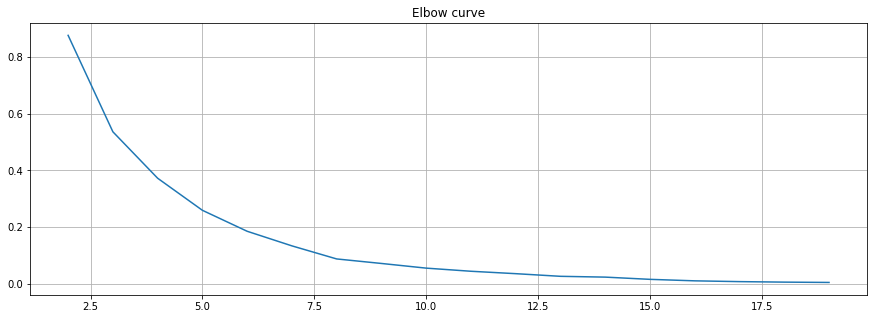

In [17]:
from sklearn.cluster import KMeans
X=cleaned_data

#within cluster sum of squares. We calcuate the sum of squares of the distance of each data point
#in cluster k from their center point ki
wcss=[]
for k in range(2,20):
    k_means=KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
fig=plt.figure(figsize=(15,5))
plt.plot(range(2,20),wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [18]:
#the change in the slopeof the curve is not significant after k=5. Hence we select no. of clusters to be 5
from scipy.cluster.vq import kmeans,vq

#computing K-Means with K=5 (5 clusters)
centroids,_=kmeans(cleaned_data,5)

#assign each sample to a cluster
idx,_=vq(cleaned_data,centroids)
data=cleaned_data

<b> Problem Statement 6.4</b>

Prepare a separate Data frame to show which stocks belong to the same cluster

<function matplotlib.pyplot.show(*args, **kw)>

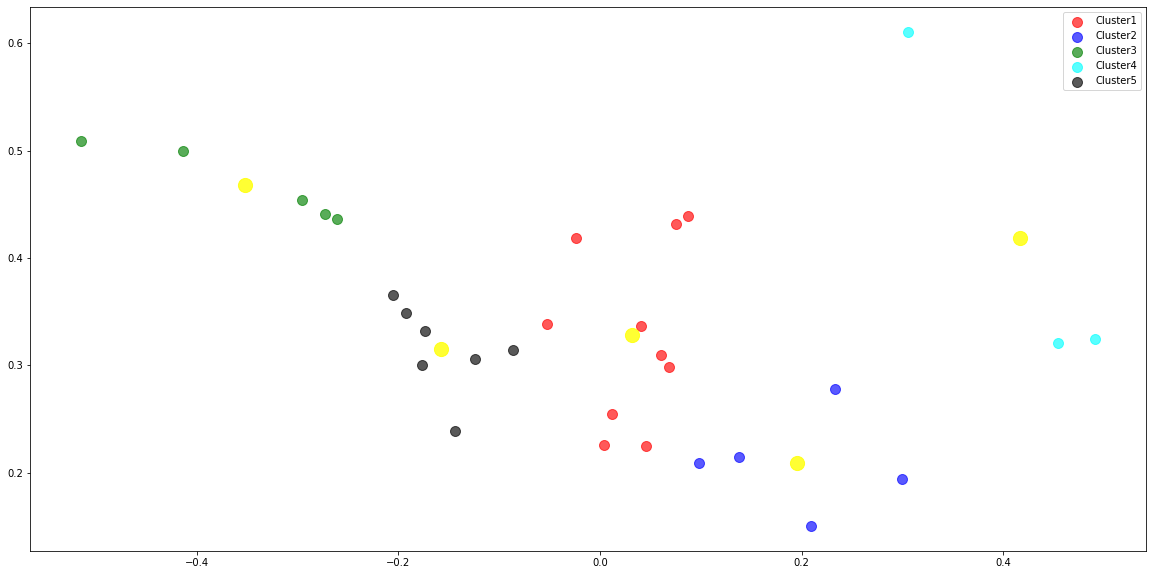

In [19]:
#using scatter plt
from matplotlib.pyplot import figure
figure(figsize=(20,10))
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red', label='Cluster1', alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue', label='Cluster2', alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green', label='Cluster3', alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan', label='Cluster4', alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black', label='Cluster5', alpha=0.65)

plt.scatter(centroids[:,0],centroids[:,1],s=200,c='yellow',alpha=0.8)
plt.legend()
plt.show

In [20]:
details=[(name,cluster) for name,cluster in zip(returns.index,idx)]

In [22]:
labels=['Stock Symbol','Cluster']
df=pd.DataFrame.from_records(details,columns=labels)
df.Cluster=df.Cluster+1
df.sort_values('Cluster')

,Stock Symbol,Cluster
0,ADANIPORTS,1
25,RELIANCE,1
23,MARUTI,1
20,ITC,1
18,INFY,1
28,TCS,1
10,GAIL,1
8,DRREDDY,1
14,HINDALCO,1
7,CIPLA,1
